In [1]:
%run init_notebookspace.py
from settings import DATA_DIR, MODEL_DIR

DATA_DIR is existant under: C:\Users\LukasGrahl\Documents\GIT\memoire1\data


In [2]:
%matplotlib inline

from gEconpy.classes.model import gEconModel

import matplotlib.pyplot as plt
import seaborn as sns
from src.plotting import plot_dfs
from src.filtering_sampling import solve_updated_mod

import numpy as np
import pandas as pd

import os
from itertools import chain

from config import plt_config
plt.rcParams.update(plt_config)

globals 

In [3]:
plot_vars = ['Y', 'O', 'A', 'C', 'I', 'L', 'w', 'r', 'pi', 'lambda']

load model

In [4]:
from config import mod4_params, mod4_priors, mod5_params, mod5_priors, mod6_params, mod6_priors
mods = {
    # 'mod4_rbc_vanilla': {'params': mod4_params,
    #                      'priors': mod4_priors,
    #                      'is_lin': False},
    # 'mod4_rbc_vanilla_lin': {'params': mod4_params,
    #                      'priors': mod4_priors,
    #                      'is_lin': True},
    # 'mod5_nk_vanilla': {'params': mod5_params,
                        # 'priors': mod5_priors,
                        # 'is_lin': False},    
    # 'mod6_nk_energy_lin2': {'params': mod6_params,
                            # 'is_lin': True,
                            # 'priors': mod6_priors},
}

# load model
for key in mods.keys():
    # load
    mods[key]['mod'] = gEconModel(os.path.join(MODEL_DIR, f'{key}.gcn'), verbose=False)
    
    # solve
    _, mods[key]['mod'] = solve_updated_mod(mods[key]['mod'], verbose=True, model_is_linear=mods[key]['is_lin'])
    assert _ == True
    
    # get shocks
    mods[key]['shocks'] = [item.base_name for item in mods[key]['mod'].shocks]

In [45]:
mod = gEconModel(os.path.join(MODEL_DIR, f'mod5_nk_vanilla_lin.gcn'), verbose=True)

Model Building Complete.
Found:
	4 equations
	4 variables
	1 stochastic shock
		 0 / 1 has a defined prior. 
	10 parameters
		 0 / 10 has a defined prior. 
	0 calibrating equations
	0 parameters to calibrate
 Model appears well defined and ready to proceed to solving.



In [46]:
mod.variables

[i_t, pi_t, v_t, y_t]

In [47]:
mod.steady_state(model_is_linear=True)

Steady state found! Sum of squared residuals is 9.30927926823657e-33


In [48]:
mod.print_steady_state()

i_ss           0.010
pi_ss         -0.000
v_ss           0.000
y_ss          -0.000


In [44]:
mod.solve_model(model_is_linear=True)

LinAlgError: Array must not contain infs or NaNs.

In [14]:
x = mod.print_steady_state()

A_ss               1.000
C_ss               2.358
I_ss               0.715
K_ss              35.732
L_ss               0.820
Y_ss               3.073
lambda_ss          0.276
r_ss               0.030
w_ss               2.436


In [15]:
x

In [10]:
mod.T

,A,C,I,K,L,Y,lambda,r,w
A,0.950000,-0.0,-0.0,-1.036027e-16,-0.0,-0.0,-0.0,-0.0,-0.0
C,0.309657,0.0,0.0,4.787472e-01,0.0,0.0,0.0,0.0,0.0
I,3.640697,-0.0,-0.0,-5.127277e-01,-0.0,-0.0,-0.0,-0.0,-0.0
K,0.072814,-0.0,-0.0,9.697454e-01,-0.0,-0.0,-0.0,-0.0,-0.0
L,0.206602,0.0,0.0,-1.566471e-01,0.0,0.0,0.0,0.0,0.0
Y,1.084291,0.0,0.0,2.481794e-01,0.0,0.0,0.0,0.0,0.0
lambda,-0.464485,0.0,0.0,-7.181208e-01,0.0,0.0,0.0,0.0,0.0
r,1.084291,0.0,0.0,-7.518206e-01,0.0,0.0,0.0,0.0,0.0
w,0.877689,0.0,0.0,4.048265e-01,0.0,0.0,0.0,0.0,0.0


In [47]:
mod.solve_model(model_is_linear=False)

C:\Users\LukasGrahl\miniconda3\envs\env_conda3_memoire1\lib\site-packages\gEconpy\classes\model.py:604: UserWarning: The following variables have steady state values close to zero and will not be log linearized: a, c, k
  warn(


LinAlgError: Array must not contain infs or NaNs.

In [30]:
for i in mod.steady_state_system:
    display(i)

-C_ss - I_ss + K_ss*r_ss + L_ss*w_ss

-delta*K_ss + I_ss

-lambda_ss + C_ss**(-sigma_C)

-L_ss**sigma_L + lambda_ss*w_ss

lambda_ss*(beta*(-delta + r_ss + 1) - 1)

A_ss*K_ss**alpha*L_ss**(1 - alpha) - Y_ss

alpha*A_ss*K_ss**(alpha - 1)*L_ss**(1 - alpha) - r_ss

(-A_ss*K_ss**alpha*(alpha - 1) - L_ss**alpha*w_ss)/L_ss**alpha

(rho_A - 1)*log(A_ss)

In [33]:
mod.print_steady_state()

A_ss               1.000
C_ss               2.358
I_ss               0.715
K_ss              35.732
L_ss               0.820
Y_ss               3.073
lambda_ss          0.276
r_ss               0.030
w_ss               2.436


In [15]:
mod.steady_state_relationships

{}

In [ ]:
mod

In [17]:
mod.variables

[A_t, C_t, I_t, K_t, L_t, R_t, W_t, Y_t, r_t, w_t]

In [15]:
mod = mods['mod5_nk_vanilla']['mod']

In [17]:
mod.free_param_dict

{'alpha': 0.35,
 'beta': 0.99,
 'eta_p': 0.75,
 'gamma_R': 0.9,
 'gamma_Y': 0.05,
 'gamma_pi': 1.5,
 'psi_p': 0.6,
 'rho_A': 0.95,
 'rho_pi_dot': 0.924,
 'sigma_C': 1.5,
 'sigma_L': 2.0}

In [18]:
mod.compute_stationary_covariance_matrix()

,A,C,Div,L,LHS,RHS,TC,U,Y,lambda,mc,pi,pi_obj,pi_star,r,w
A,1.025641e-01,0.086265,0.108225,-0.025076,-0.084945,-0.084945,0.054170,-0.007741,0.086265,-0.129397,-0.032095,-0.008818,4.446208e-16,-0.026455,-0.008974,0.079246
C,8.626483e-02,0.209727,-0.251901,0.189941,0.482193,0.482193,0.884413,-0.007056,0.209727,-0.314590,0.674686,0.128744,2.520141e-02,0.386233,-0.025428,0.694472
Div,1.082246e-01,-0.251901,0.971514,-0.554039,-1.473729,-1.473729,-2.039970,-0.006807,-0.251901,0.377852,-1.788069,-0.349708,-6.300353e-02,-1.049125,0.035232,-1.485930
L,-2.507580e-02,0.189941,-0.554039,0.330795,0.872520,0.872520,1.277297,0.001055,0.189941,-0.284912,1.087356,0.211635,3.877140e-02,0.634905,-0.025315,0.946502
LHS,-8.494484e-02,0.482193,-1.473729,0.872520,2.647199,2.647199,3.340849,0.004022,0.482193,-0.723289,2.858656,0.604682,2.494451e-01,1.814047,-0.009821,2.468329
RHS,-8.494484e-02,0.482193,-1.473729,0.872520,2.647199,2.647199,3.340849,0.004022,0.482193,-0.723289,2.858656,0.604682,2.494451e-01,1.814047,-0.009821,2.468329
TC,5.416986e-02,0.884413,-2.039970,1.277297,3.340849,3.340849,5.158511,-0.007419,0.884413,-1.326620,4.274098,0.828021,1.541163e-01,2.484064,-0.114086,3.881214
U,-7.741120e-03,-0.007056,-0.006807,0.001055,0.004022,0.004022,-0.007419,0.000587,-0.007056,0.010583,-0.000363,0.000098,-1.825893e-04,0.000295,0.000718,-0.008474
Y,8.626483e-02,0.209727,-0.251901,0.189941,0.482193,0.482193,0.884413,-0.007056,0.209727,-0.314590,0.674686,0.128744,2.520141e-02,0.386233,-0.025428,0.694472
lambda,-1.293973e-01,-0.314590,0.377852,-0.284912,-0.723289,-0.723289,-1.326620,0.010583,-0.314590,0.471885,-1.012030,-0.193117,-3.780212e-02,-0.579350,0.038142,-1.041708


In [14]:
C = np.linalg.pinv(.compute_stationary_covariance_matrix())

### IRF

In [9]:
shock_size = -.1
sim_length = 120

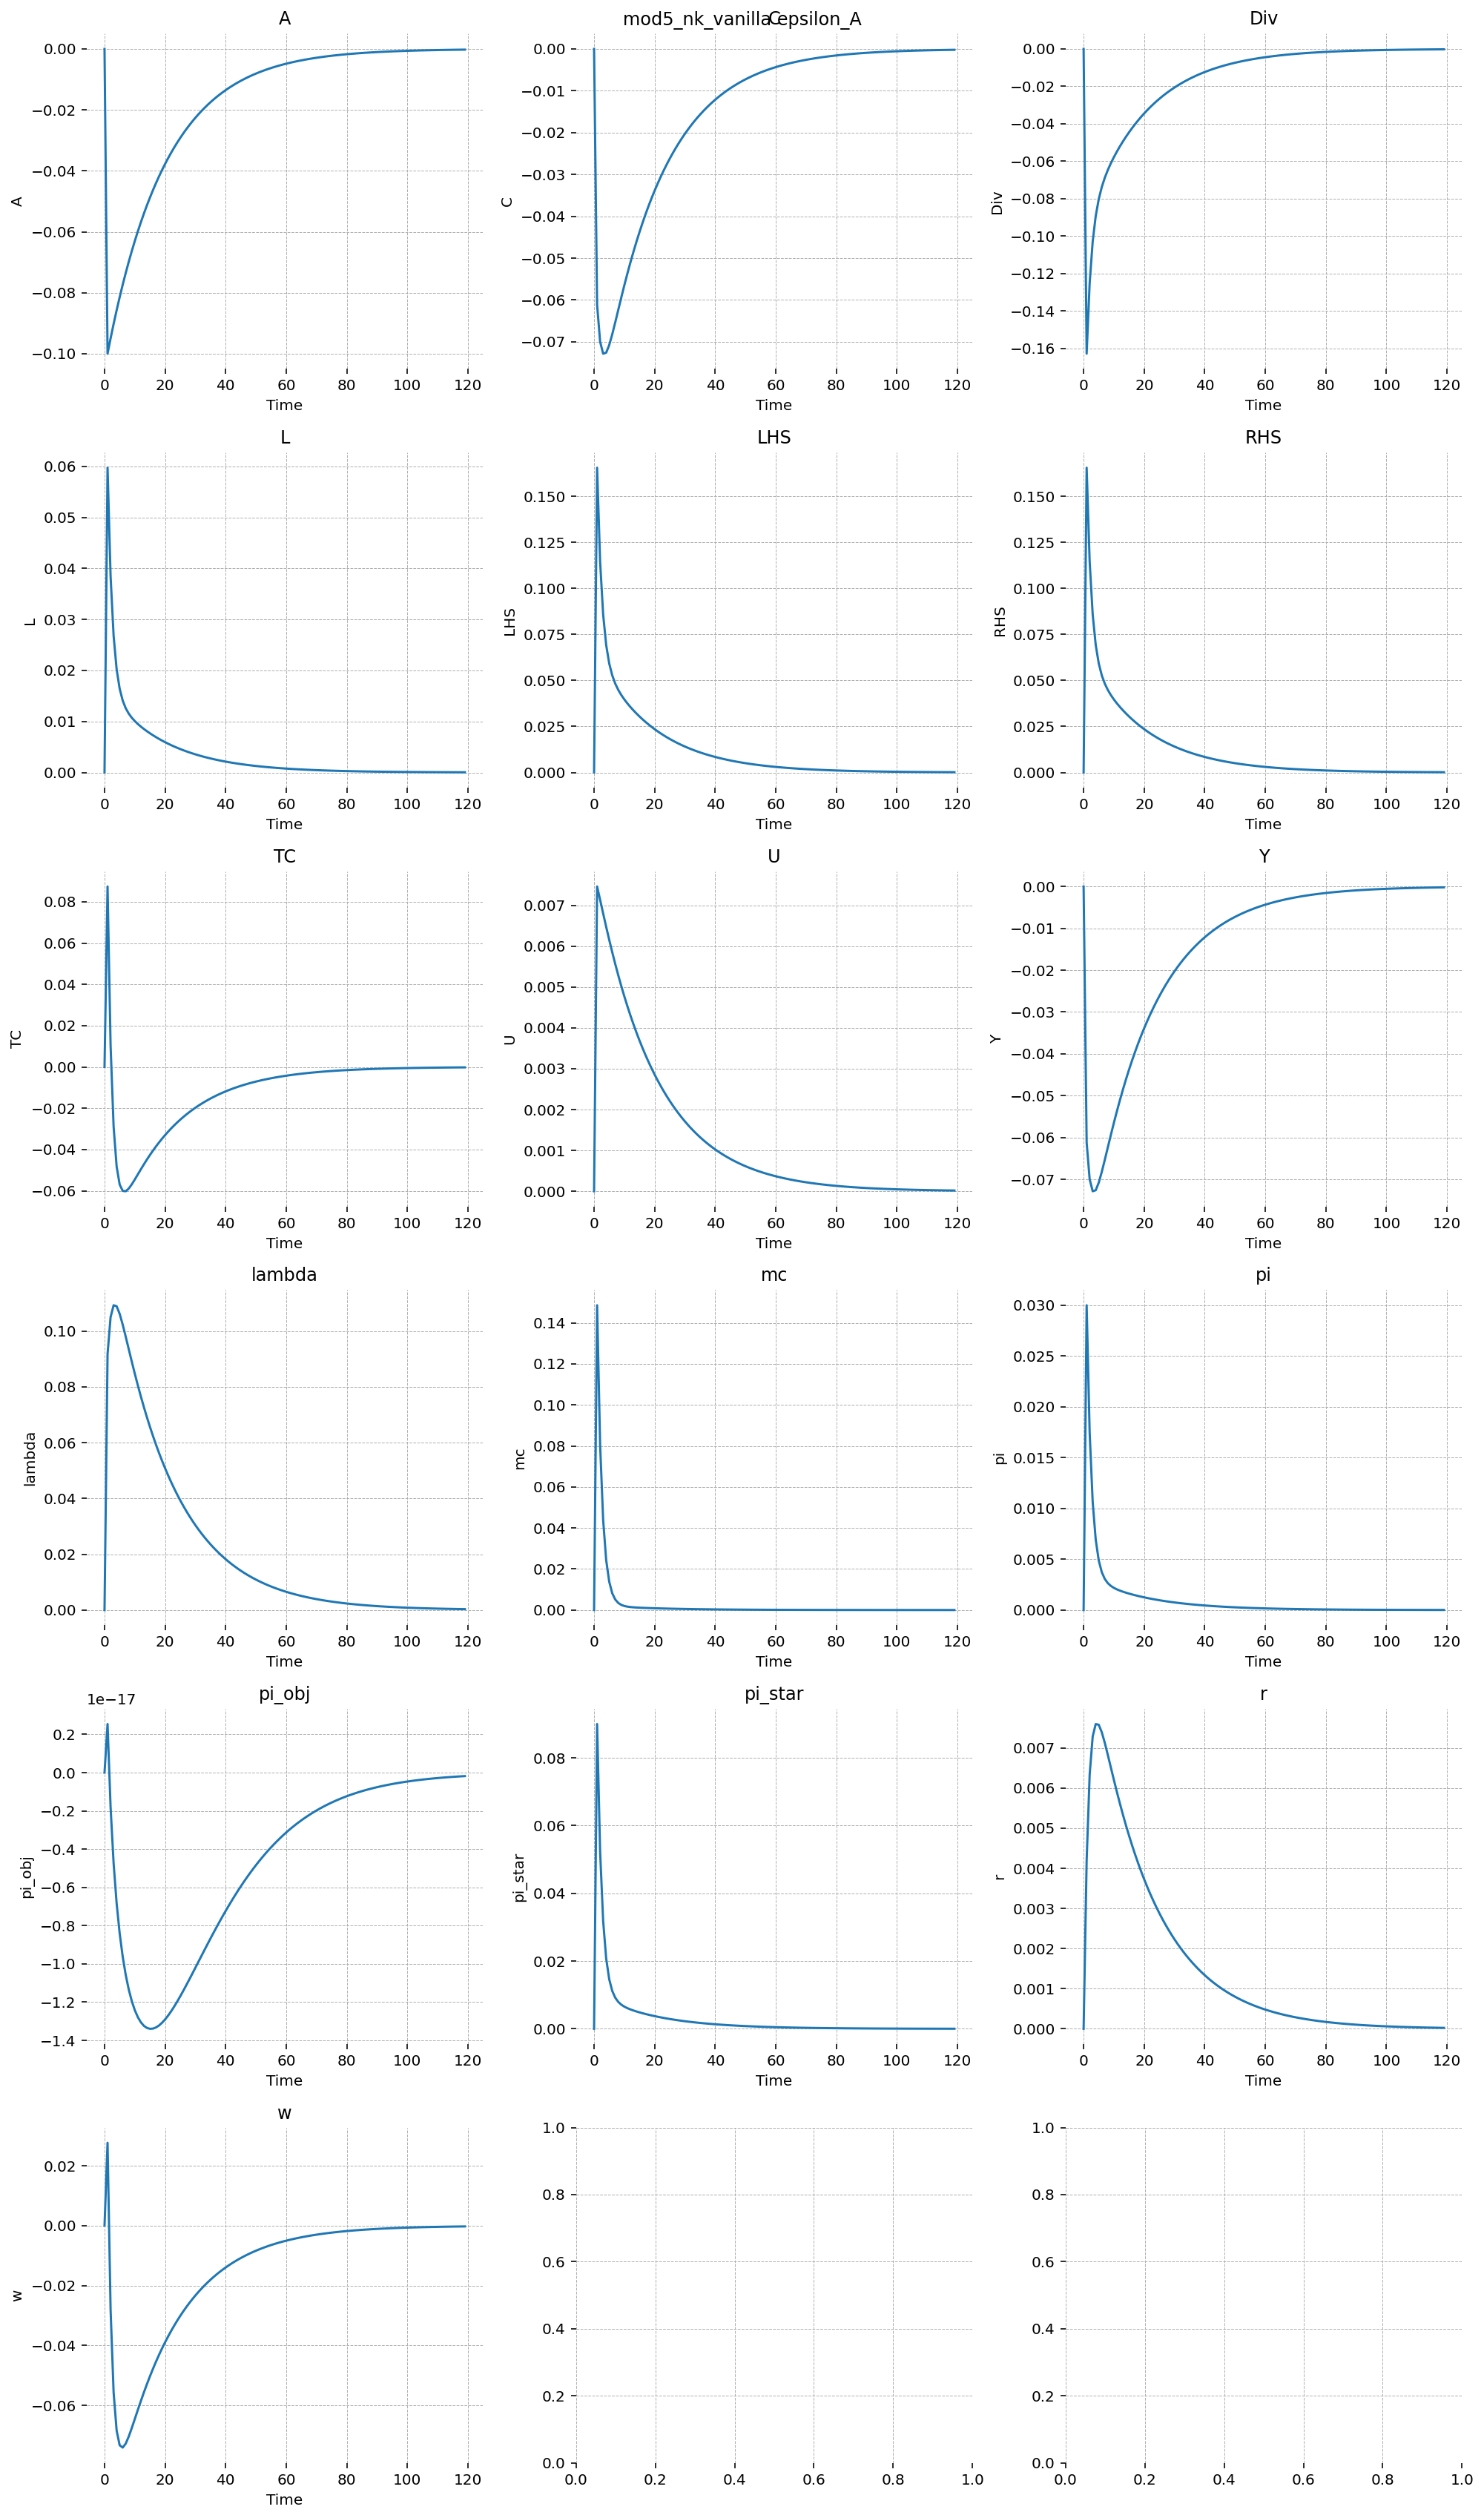

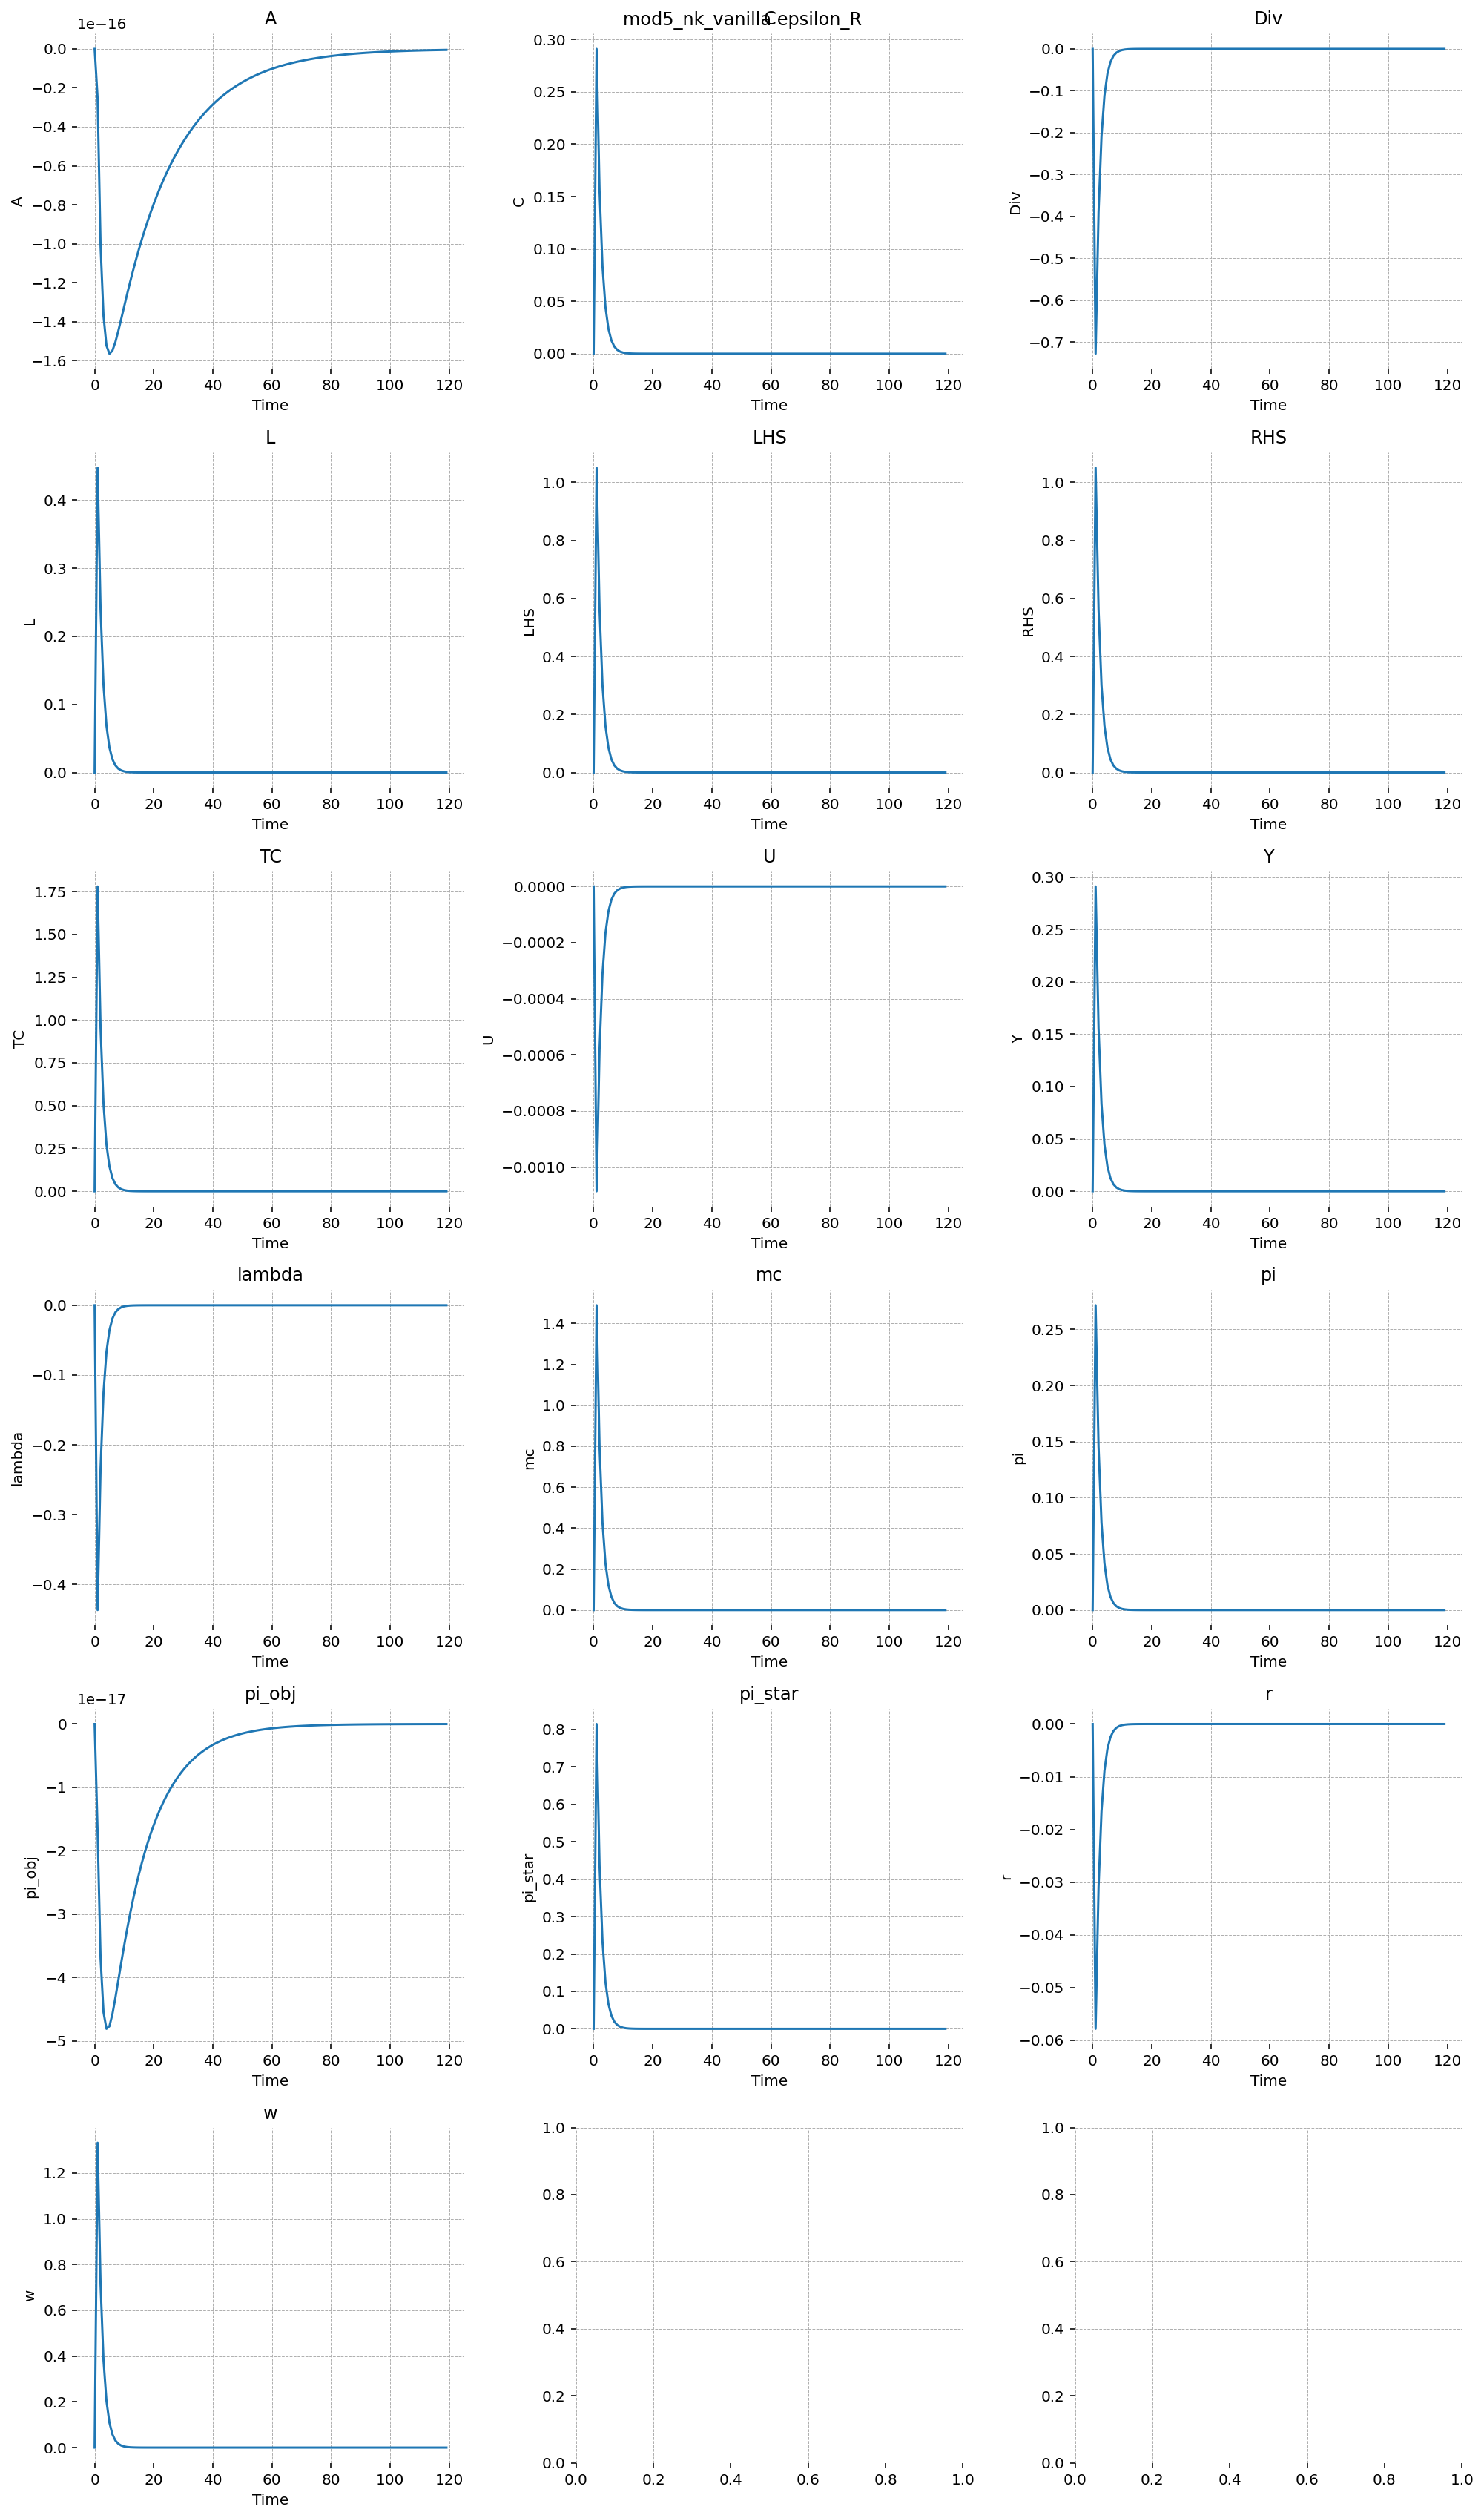

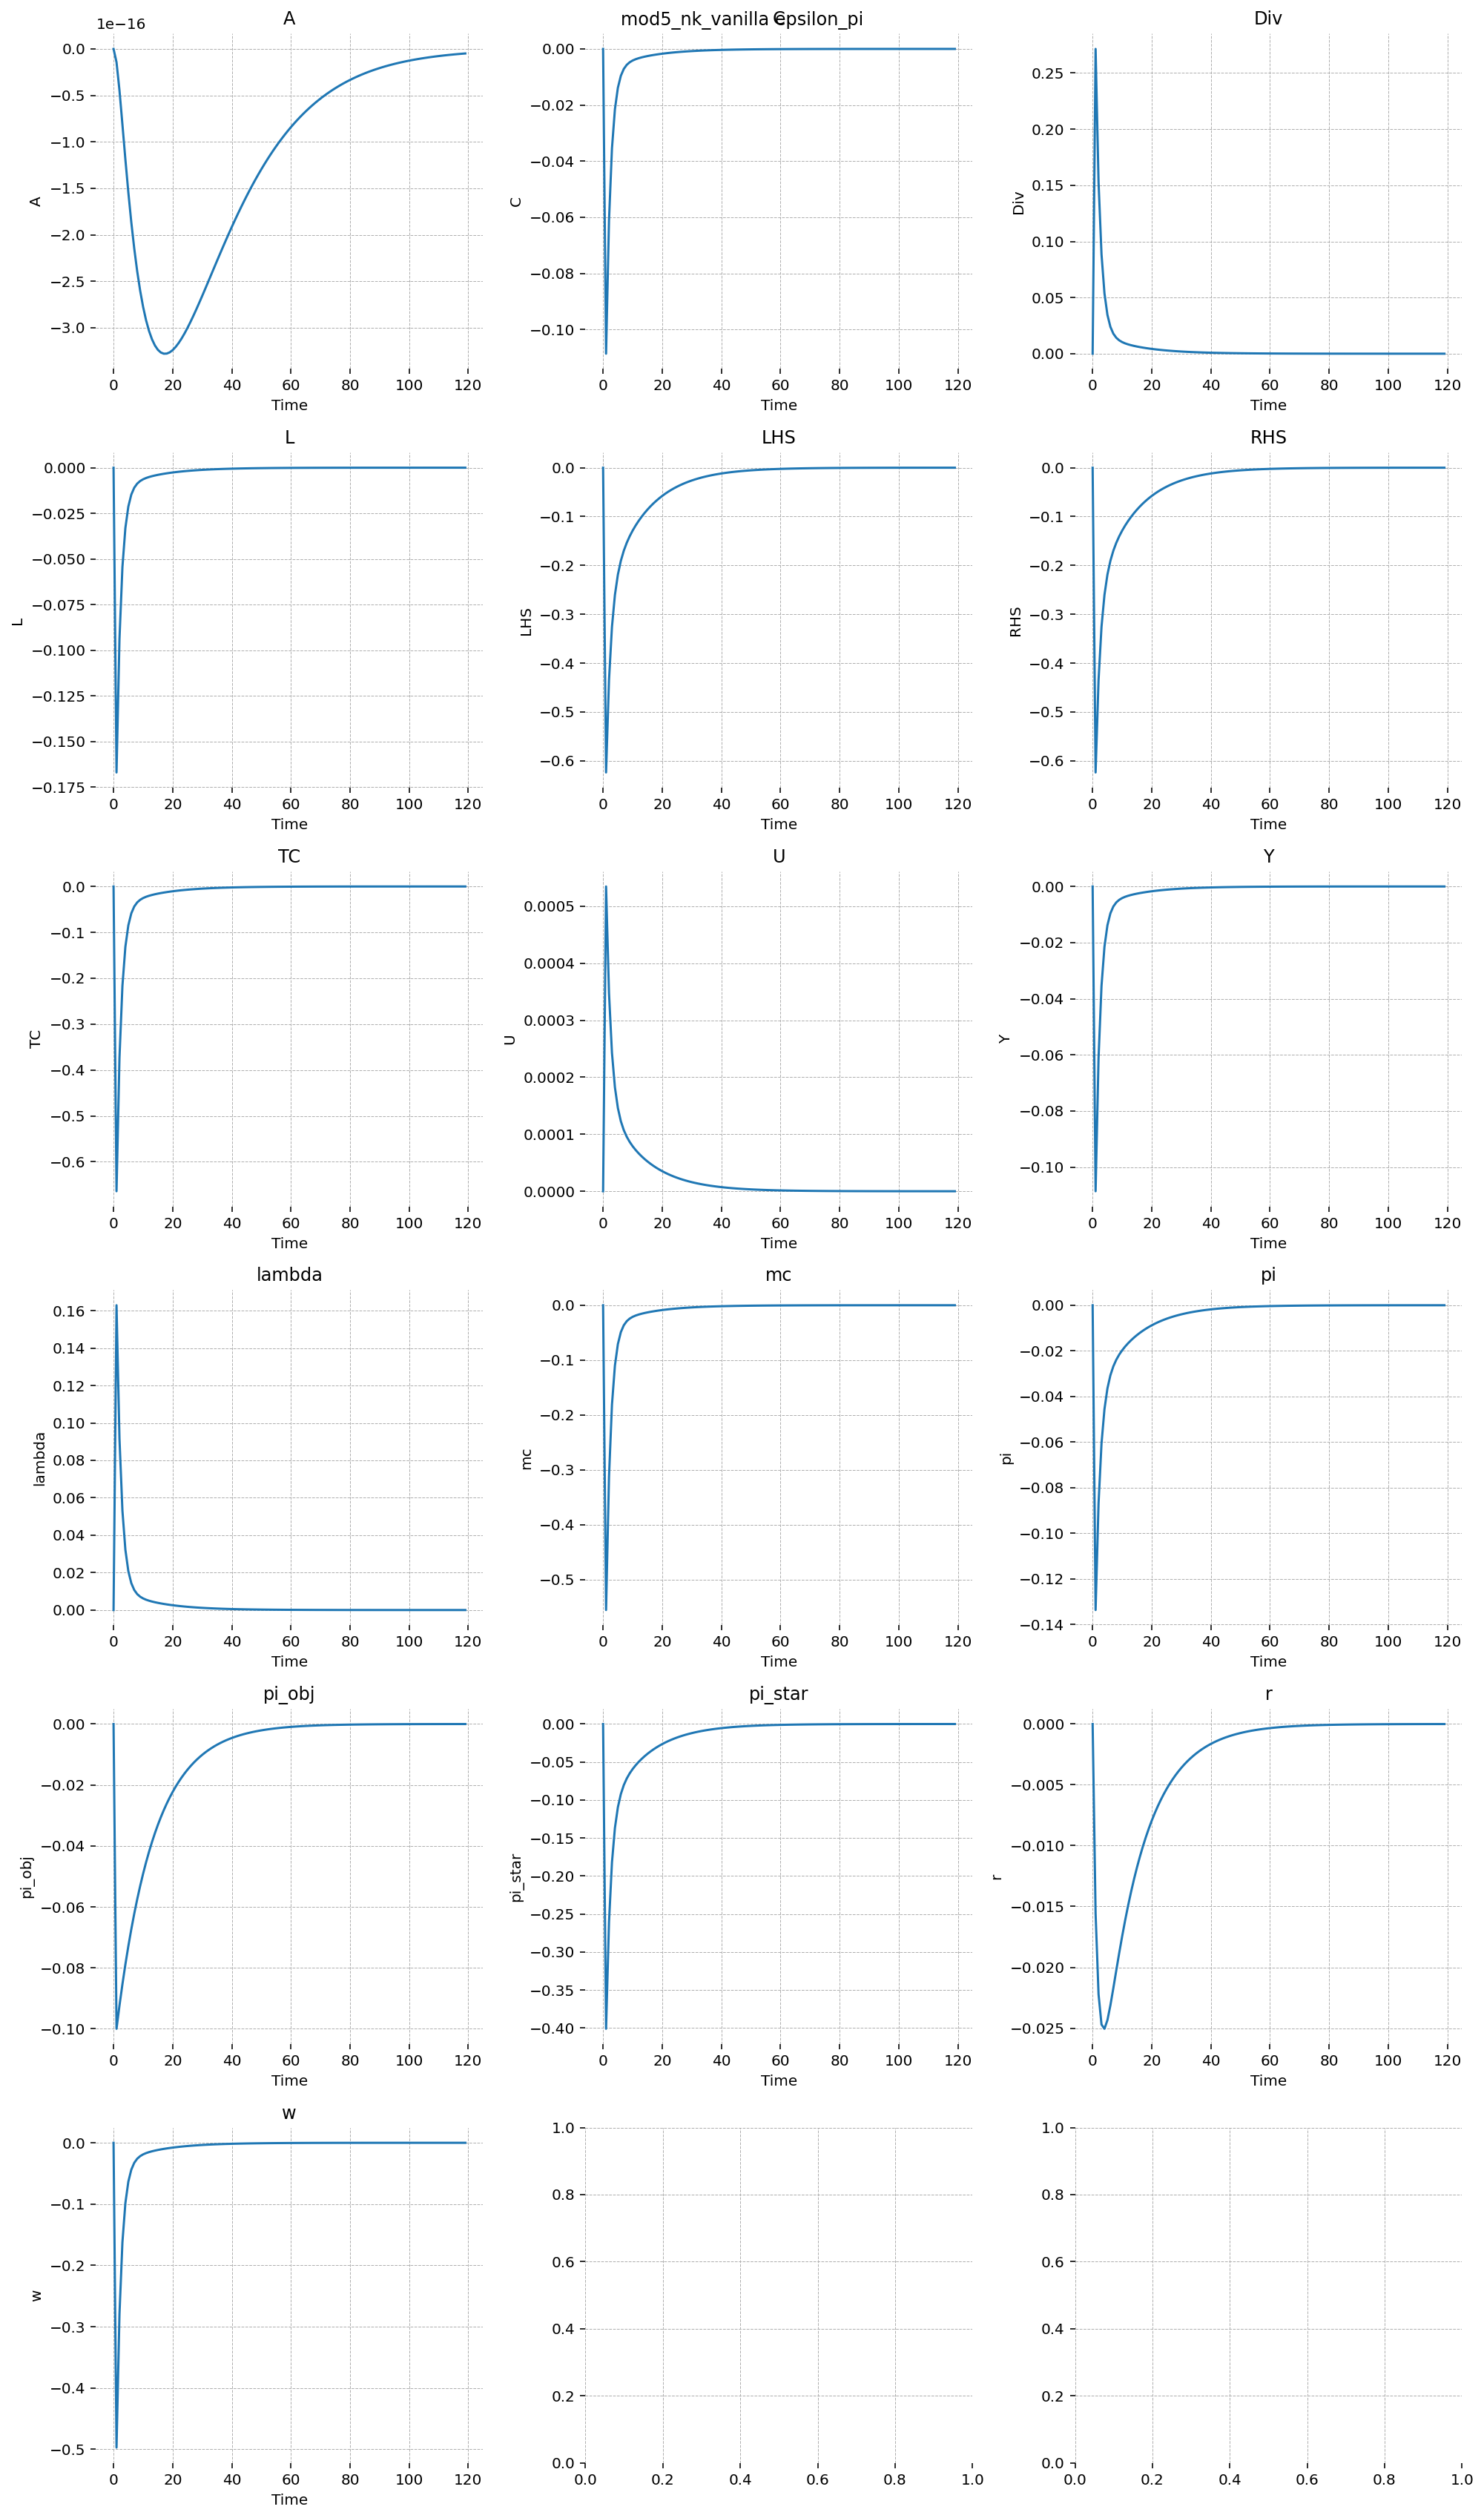

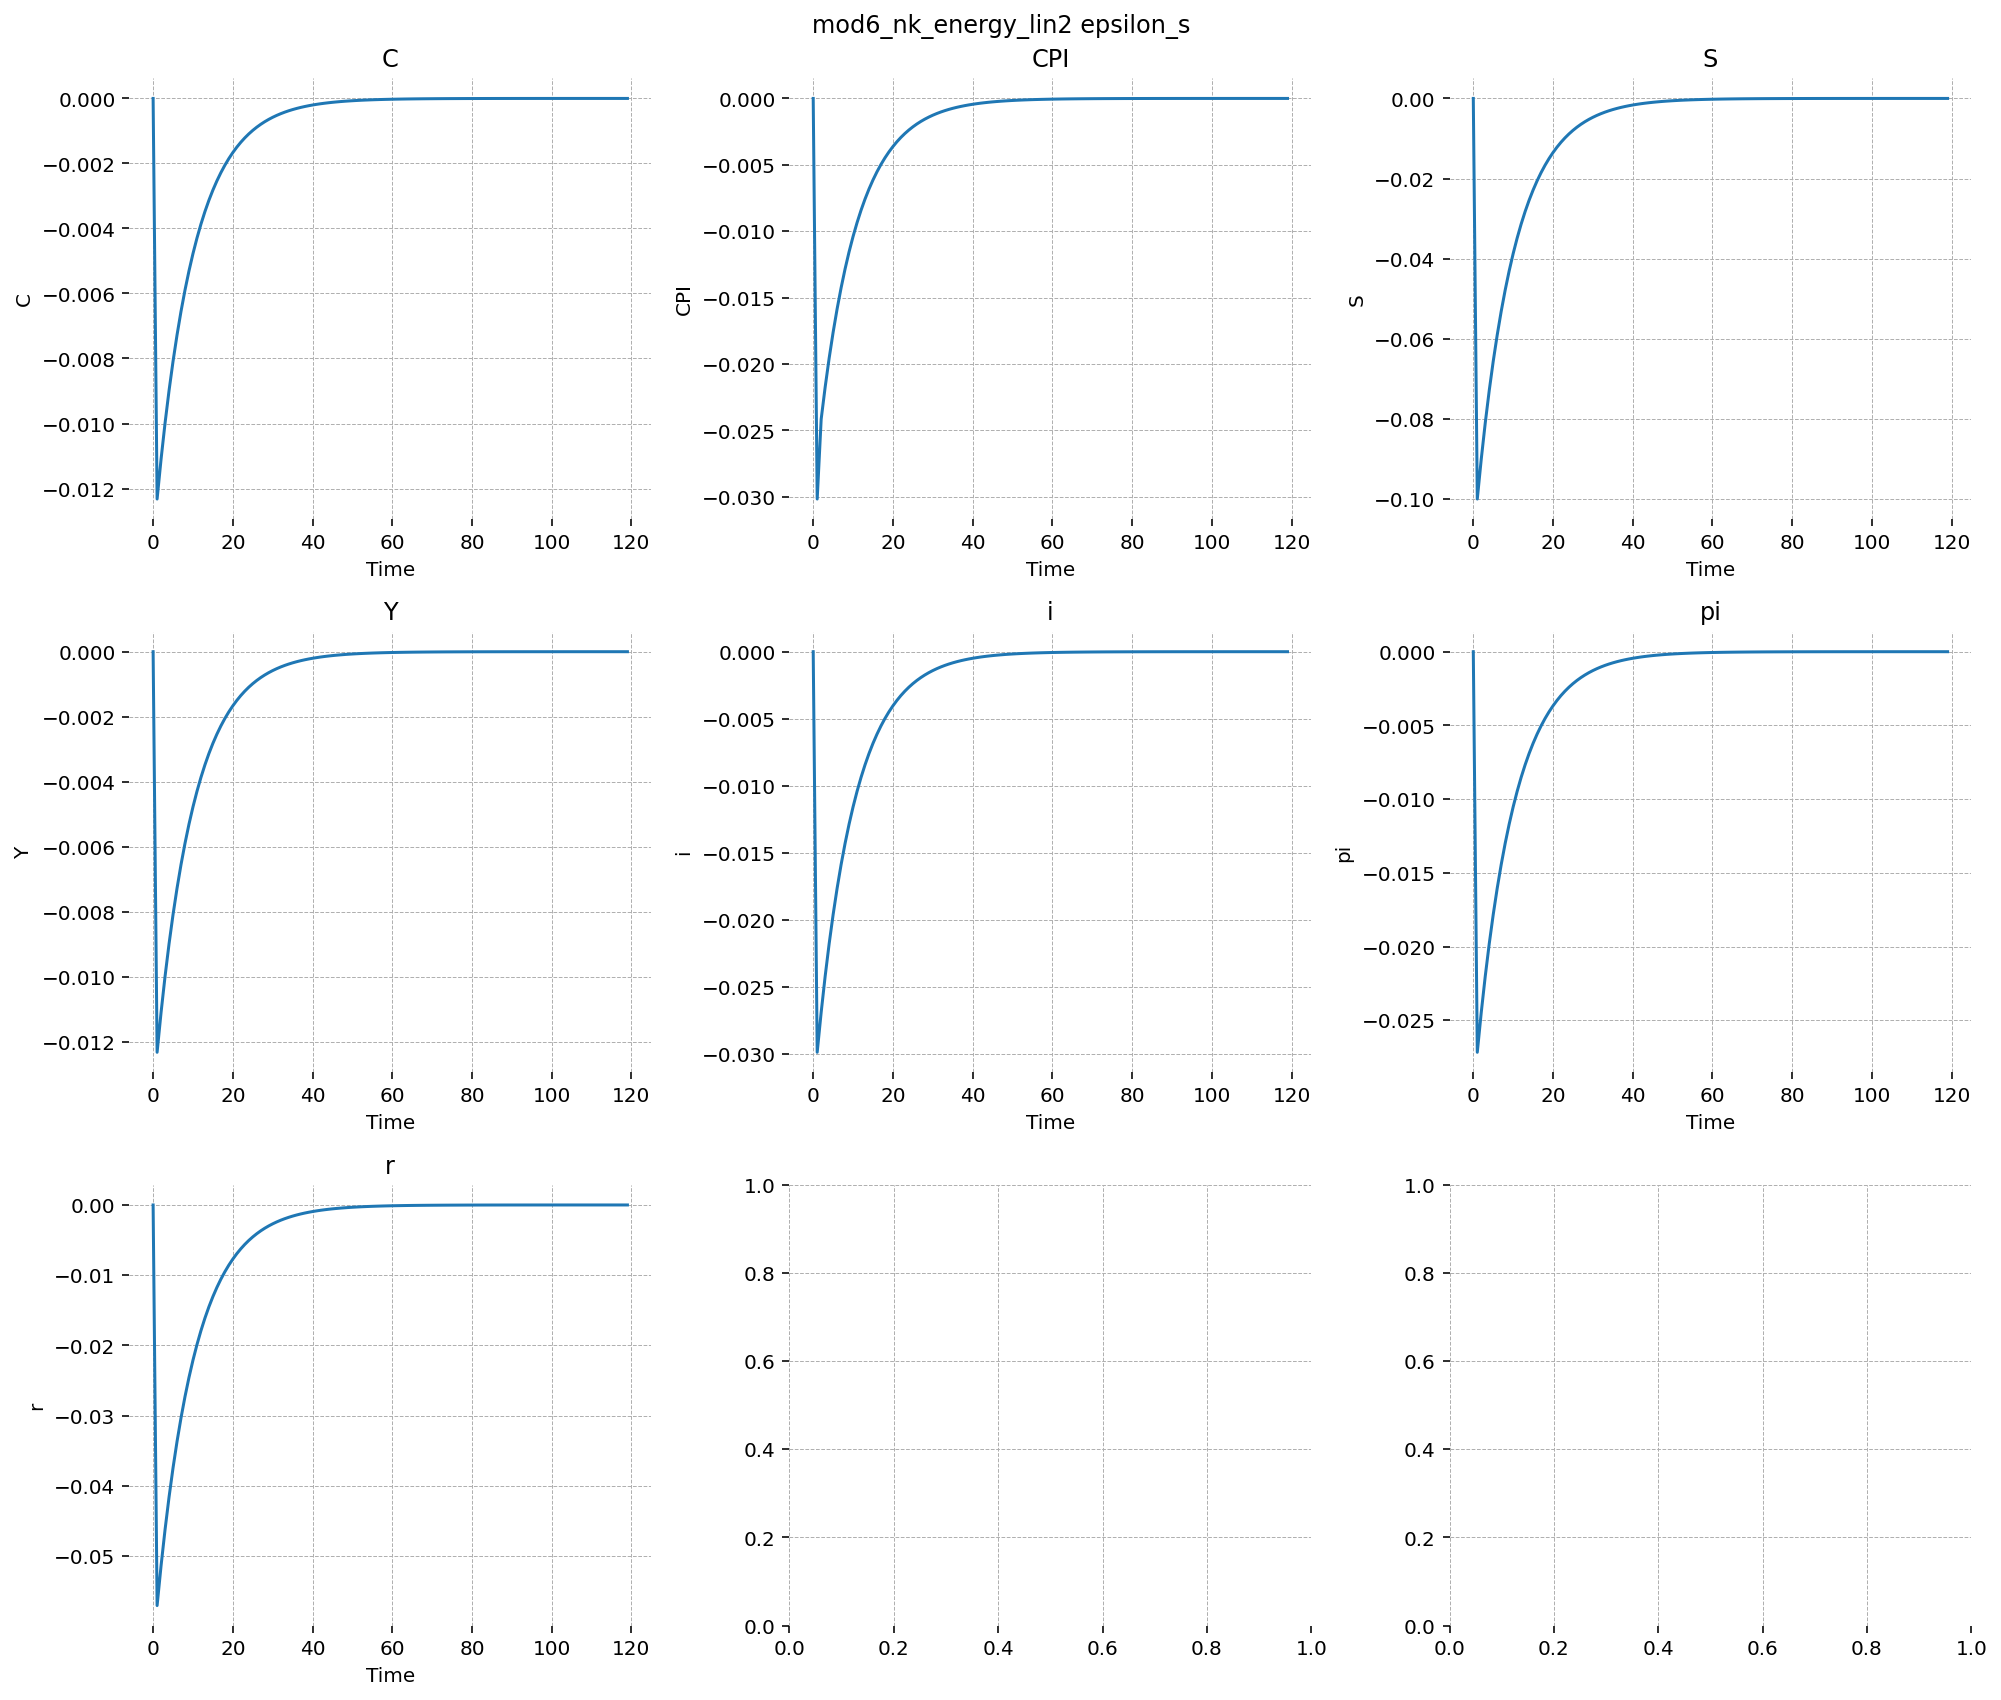

In [10]:
for key in mods.keys():
    # get irfs
    mods[key]['irf'] = mods[key]['mod'].impulse_response_function(simulation_length=sim_length, shock_size=shock_size)
    
    # plot irf per shock
    for shock in mods[key]['shocks']:
        plot_dfs(mods[key]['irf'].unstack().loc[:, shock].unstack(), sns.lineplot, fig_title=f'{key} {shock}')